In [1]:
import pandas as pd
from plotting import visualize_time_series

# Visualise the data frame

In [2]:
df = pd.read_csv('../data/train.csv')
df.columns = ['date','y']
df.dropna(how='all', inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%y')
df.sort_values(by='date', inplace=True)
# Any missing values?
data = {
    'date': pd.date_range(start='2015-01-01', end='2021-02-01', freq='MS'),
    'missing': False
}
dfx = pd.DataFrame(data)
df = df.merge(dfx, on='date', how='outer')
print('Any missing `y`?\n', df.isna().sum())
df

Any missing `y`?
 date       0
y          0
missing    0
dtype: int64


,date,y,missing
0,2015-01-01,1.91157,False
1,2015-02-01,1.44733,False
2,2015-03-01,1.89355,False
3,2015-04-01,2.03274,False
4,2015-05-01,2.27843,False
...,...,...,...
69,2020-10-01,2.21851,False
70,2020-11-01,2.01204,False
71,2020-12-01,1.97353,False
72,2021-01-01,2.19952,False


In [3]:
df.reset_index().describe()

,index,date,y
count,74.000000,74,74.000000
mean,36.500000,2018-01-15 10:03:14.594594560,2.474047
min,0.000000,2015-01-01 00:00:00,1.447330
25%,18.250000,2016-07-08 18:00:00,1.980592
50%,36.500000,2018-01-16 12:00:00,2.444870
75%,54.750000,2019-07-24 06:00:00,2.919247
max,73.000000,2021-02-01 00:00:00,3.791290
std,21.505813,NaN,0.593002


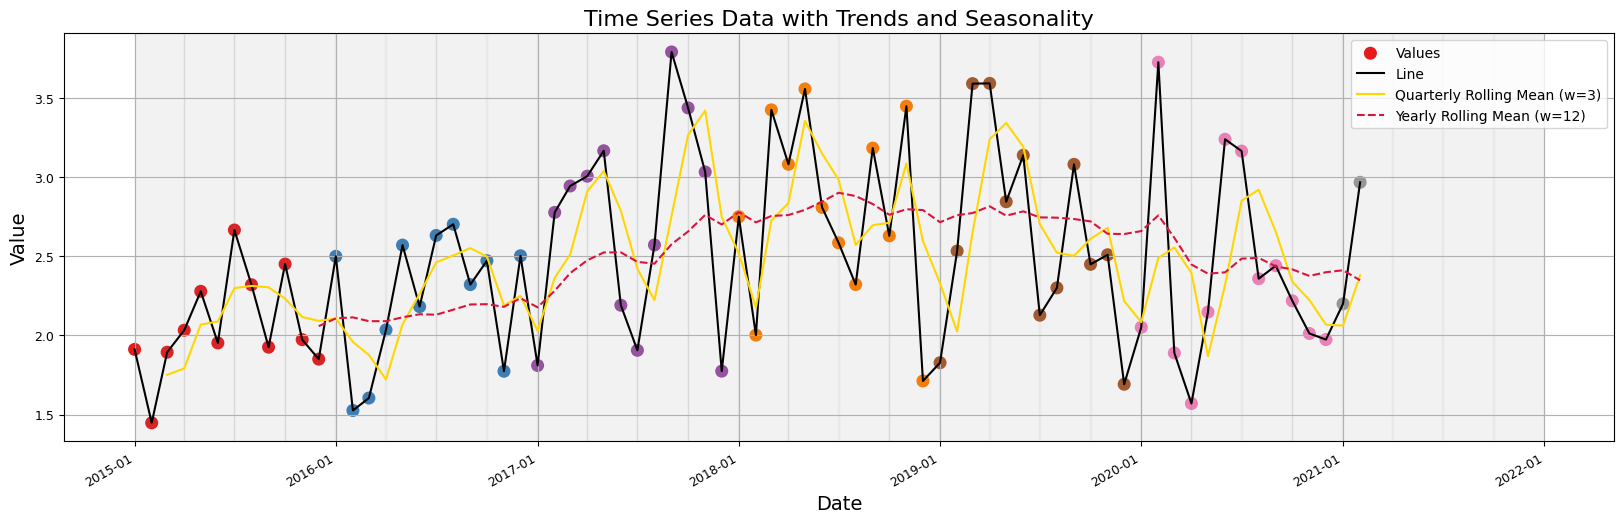

In [4]:
visualize_time_series(df.reset_index())

# Seasonality Analysis Reference

For an in-depth analysis of the seasonality in the time series data, especially concerning the year 2021, please refer to the dedicated notebook `which_seasonality_concerns_for_2021.ipynb`. This notebook provides an examination of the seasonal patterns and anomalies that may significantly impacted model performance for the year 2021 and when training a model on that data.

## Key Highlights from `which_seasonality_concerns_for_2021.ipynb`:
- The analysis involves detailed seasonal decomposition, focusing on identifying the primary seasonal periods.
- Hyperparameter tuning of the NaiveForecaster model is conducted to optimize for the seasonality observed in the data.
- Visualization of the decomposed components and residuals are employed to pinpoint specific anomalies and trends.
- The year 2021 is given special attention due to its unique pattern, potentially influencing the forecasting models' effectiveness.

In the following cell I will just simply analyse the seasonality but please refer to the other notebook.

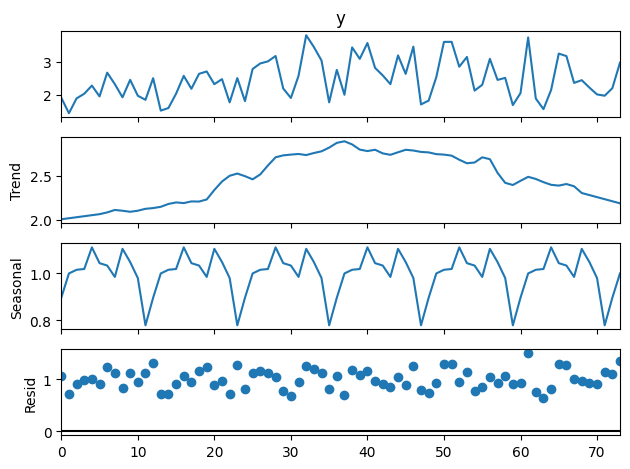

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition using a multiplicative model.
# This is because the seasonal amplitude appears to be proportional to the level of the time series.
decomposed = seasonal_decompose(df['y'], model='multiplicative', period=12, extrapolate_trend='freq')

# Plot the decomposed components of the time series.
fig = decomposed.plot()
plt.show()

# Expanded Overview of `train_and_evaluate.py`

The `train_and_evaluate.py` script is an extensive framework for forecasting time series data using a variety of models, both traditional and neural network-based. It integrates data preparation, model training, evaluation, and visualization.

## Data Preparation
- Loads a time series dataset from `../data/train.csv` and preprocesses it by renaming columns, dropping null values, and sorting by date.
- The script then splits the data into training and testing sets based on predefined indices (`last_idxs`).

## Model Initialization
- Utilizes `initialize_models` to set up a diverse range of forecasting models:
  - Traditional time series models from `sktime` library: `NaiveForecaster`, `ThetaForecaster`, `ExponentialSmoothing`, `TBATS`, `AutoARIMA`, and `Prophet`.
  - Custom neural network models built with PyTorch: `SimpleRNN`, `SimpleLSTM`, `SimpleGRU`, and `SimpleTransformer`. These models are designed with varying architectures to suit different time series forecasting needs.

## Training and Evaluation
- The training and evaluation process is tailored to the type of model:
  - **Traditional Models**: The script fits each model on `y_train` and then uses it to predict `y_test`, leveraging the `forecast_and_evaluate` function.
  - **Neural Network Models**: Sequences are prepared using either `create_sequences` or `create_variable_length_sequences`. The models are then trained using `train_model` and evaluated with `forecast_and_evaluate_pytorch`.
- After prediction, the script calculates performance metrics for different segments of the forecast period and appends these metrics to a results list for analysis.

## The models
Certainly, let's briefly and precisely explain each of the models mentioned in the script:

1. **NaiveForecaster**: A simple model that predicts future values based on the most recent observed value. It's a baseline model often used for comparison with more complex models.

2. **ThetaForecaster**: A model that applies a transformation to the time series data to make it smoother, then uses simple exponential smoothing for forecasting. It's effective for capturing trends.

3. **ExponentialSmoothing**: This model uses exponential weights to smooth past data, allowing it to forecast based on trends and seasonality. It's versatile and adapts well to data with a clear seasonal pattern.

4. **TBATS**: Stands for Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal components. It's a comprehensive model that can handle complex seasonal patterns and multiple seasonality.

5. **AutoARIMA**: An automated version of the ARIMA (AutoRegressive Integrated Moving Average) model, which forecasts based on past values and past errors. It's widely used for its flexibility in handling different types of time series data.

6. **Prophet**: Developed by Facebook, it's designed for forecasting with daily observations that display patterns on different time scales. It's robust to missing data and shifts in the trend, and it should handle outliers well.

7. **SimpleRNN**: A basic Recurrent Neural Network model that can capture temporal dependencies in data. It's straightforward but can struggle with long-term dependencies due to vanishing gradients.

8. **SimpleLSTM**: A Long Short-Term Memory model, an advanced RNN that can capture long-term dependencies in data. It's more complex but effective for a wide range of time series tasks.

9. **SimpleGRU**: A Gated Recurrent Unit model, similar to LSTM but more efficient. It's used for capturing temporal dependencies and is effective in scenarios where LSTM might be considered too heavy.

10. **SimpleTransformer**: Utilizes the Transformer architecture, known for its self-attention mechanism, allowing it to weigh the importance of different parts of the input data. It's powerful for handling sequential data with complex patterns.

## Hyperparameters and Model Configuration
- Neural network models are configured with specific hyperparameters like input size, hidden size, number of layers, output size, and dropout rate to control model complexity and prevent overfitting.
- The `train_model` function incorporates a learning rate and epoch count for the training process, with the model training loop involving forward pass, loss computation, and backpropagation.

**Note:** It's advisable to perform a hyperparameter search grid to optimize model performance. However, due to time constraints, this step was not implemented in the current version of the pipeline.

## Results and Visualization
- Predictions from each model are stored in the original DataFrame and saved in the `../models` directory.
- The script generates a summary of the performance metrics for each model, which is saved as a CSV file in the `../pics` directory.
- Additionally, prediction plots are generated using the `plot_predictions` function and saved as PDF files.

## Additional Functionality
- The script includes the capability to handle variable-length sequences for training neural network models, which can be critical for capturing different temporal patterns in the data.
- Model saving functionality is implemented to store trained models on disk for later use.
- The script is structured to loop over different indices for training/testing splits, allowing for comprehensive evaluation over multiple forecasting scenarios.

In [6]:
# ! python train_and_validate.py

# Prediction Results Visualization

The PDF file displayed below visualizes the comparison of actual time series data against the predictions made by different forecasting models. Each plot corresponds to a unique model's forecast overlaid on the actual data, allowing for a visual assessment of the model's performance.

## Viewing the PDF
- The PDF is embedded directly in the notebook using an inline frame for convenient access.
- You can interact with the PDF using the embedded viewer's controls to zoom in/out and navigate through the pages.

## Interpretation of the Plots
- The blue line represents the actual historical data points.
- The dashed lines of various colors represent the predictions from different models.
- These plots are a visual appraisal of how well each model captures the trends and seasonality of the actual data.
- Discrepancies between the predicted and actual values are easily discernible, providing insight into the models' predictive capabilities.


In [7]:
from IPython.display import IFrame

# Specify the path to the PDF file
pdf_path = '../pics/predictions_last_-26.pdf'

# Display the PDF using an inline frame
IFrame(pdf_path, width=600, height=1000)

In [8]:
from IPython.display import IFrame

# Specify the path to the PDF file
pdf_path = '../pics/predictions_last_-14.pdf'

# Display the PDF using an inline frame
IFrame(pdf_path, width=600, height=1000)

In [16]:
from IPython.display import IFrame

# Specify the path to the PDF file
pdf_path = '../pics/predictions_last_-2.pdf'

# Display the PDF using an inline frame
IFrame(pdf_path, width=600, height=1000)

# Model Performance Comparison

The table below presents a comparative analysis of various forecasting models implemented on our time series data. The performance metrics are split into two parts, representing the first and second 12-month periods within the last 26 months of the dataset. This allows us to examine how each model performs over different stages of the series.

## Metrics Evaluated:
- **RMSE (Root Mean Square Error)**: Measures the model's prediction error magnitude.
- **MAE (Mean Absolute Error)**: Represents the average absolute difference between predicted and actual values.
- **MAPE (Mean Absolute Percentage Error)**: Expresses the prediction error as a percentage, which is particularly useful for comparative analysis.

In [15]:
! ls ../pics/

predictions_last_-14.pdf predictions_last_-26.pdf results_last_-2.csv
predictions_last_-2.pdf  results_last_-14.csv     results_last_-26.csv


In [10]:
filepath = '../pics/results_last_-26.csv'
pd.read_csv(filepath).style.background_gradient(cmap='viridis')

,model_name,first_12_RMSE,first_12_MAE,first_12_MAPE,second_12_RMSE,second_12_MAE,second_12_MAPE,RMSE,MAE,MAPE
0,NaiveForecaster,0.514246,0.407738,16.463302,1.059594,0.898397,40.871735,0.832823,0.653068,28.667519
1,ThetaForecaster,0.629416,0.564989,23.599569,0.993874,0.901074,41.700317,0.831850,0.733031,32.649943
2,ExponentialSmoothing,0.616762,0.570901,23.872670,1.027559,0.928053,43.207388,0.847429,0.749477,33.540029
3,TBATS,0.554910,0.431166,14.882006,0.759768,0.512388,18.898130,0.665272,0.471777,16.890068
4,ARIMA,0.601991,0.518185,21.493806,0.687524,0.641471,29.218679,0.646174,0.579828,25.356242
5,SARIMAX,0.549743,0.464634,19.395239,0.682197,0.635376,28.861590,0.619520,0.550005,24.128414
6,Prophet,0.659985,0.523454,21.593275,0.928111,0.835095,39.321440,0.805286,0.679274,30.457357
7,SimpleRNN,0.602475,0.520743,21.809742,0.703300,0.658488,30.215530,0.654831,0.589615,26.012636
8,SimpleLSTM,0.600893,0.520006,21.793580,0.705810,0.661073,30.366958,0.655454,0.590539,26.080269
9,SimpleGRU,0.600438,0.516540,21.386342,0.685988,0.639734,29.116904,0.644634,0.578137,25.251623


# Forecasting for `test.csv`

The forecasting pipeline aims to predict future values of a given time series, with the primary data spanning from January 2015 to February 2021. The goal is to extend predictions from March 2021 to February 2022. The implementation for this pipeline is contained in the `/src/train_predict_for_2022.py` file.

## Execution
The pipeline is engineered for simplicity, enabling predictions to be generated with a single command execution. It is compatible with Python versions 3.7, 3.8, and 3.9, with a preference for 3.7.

## Pipeline Components
- **Data Loading:** The pipeline loads data from the `train.csv` file.
- **Model Initialization:** Models are initialized using the `initialize_models` function.
- **Model Training and Forecasting:** Models are trained and used to forecast the next 12 time steps.
- **Saving Trained Models:** Trained model parameters are saved to preserve reproducibility.

## Model Training and Forecasting
- Traditional forecasting models from the `sktime` package are utilized, excluding the Prophet model to focus on core time series modeling expertise.
- Additionally, neural network predictions are generated using custom PyTorch models for comparative analysis.

## Output
Predictions are formatted to match the structure of the `train.csv` file and saved as `test.csv` for submission. This `test.csv` file contains the forecasted values for the time period from March 2021 to February 2022.

## Uniqueness
The solution is uniquely crafted for this case, ensuring a blend of established methodologies and original code for a robust forecasting approach.

In [11]:
# ! python train_predict_for_2022.py

In [12]:
filepath = '../output/test.csv'
results_wide_df = pd.read_csv(filepath)
results_wide_df['date'] = pd.to_datetime(results_wide_df['date'])
results_wide_df.style.background_gradient(cmap='viridis')

,date,ARIMA,ExponentialSmoothing,NaiveForecaster,Prophet,SARIMAX,SimpleGRU,SimpleLSTM,SimpleRNN,SimpleTransformer,TBATS,ThetaForecaster
0,2021-03-01 00:00:00,2.579494,2.648327,1.889060,3.053239,2.263985,2.679308,2.661728,2.658852,2.629535,2.261312,2.611724
1,2021-04-01 00:00:00,2.465283,2.648235,1.569530,3.112486,2.128013,2.646683,2.639420,2.639620,2.629535,2.400421,2.593574
2,2021-05-01 00:00:00,2.465283,2.922579,2.147430,2.971079,2.333226,2.644077,2.636515,2.636423,2.629535,2.374105,2.818739
3,2021-06-01 00:00:00,2.465283,2.711780,3.239420,2.180165,2.585181,2.644146,2.636169,2.635942,2.629535,2.290534,2.701451
4,2021-07-01 00:00:00,2.465283,2.637773,3.164770,3.200265,2.630249,2.644329,2.636134,2.635863,2.629535,2.283884,2.627899
5,2021-08-01 00:00:00,2.465283,2.566594,2.358330,3.108934,2.404951,2.644489,2.636143,2.635854,2.629535,2.369725,2.508735
6,2021-09-01 00:00:00,2.465283,2.866261,2.440640,2.938758,2.383695,2.644682,2.636154,2.635851,2.629535,2.431019,2.840477
7,2021-10-01 00:00:00,2.465283,2.711641,2.218510,3.110689,2.360487,2.644800,2.636159,2.635851,2.629535,2.337099,2.717156
8,2021-11-01 00:00:00,2.465283,2.493823,2.012040,3.169936,2.318496,2.644873,2.636165,2.635851,2.629535,2.117436,2.554179
9,2021-12-01 00:00:00,2.465283,1.978209,1.973530,3.028529,2.339406,2.644807,2.636168,2.635851,2.629535,1.936534,1.946181


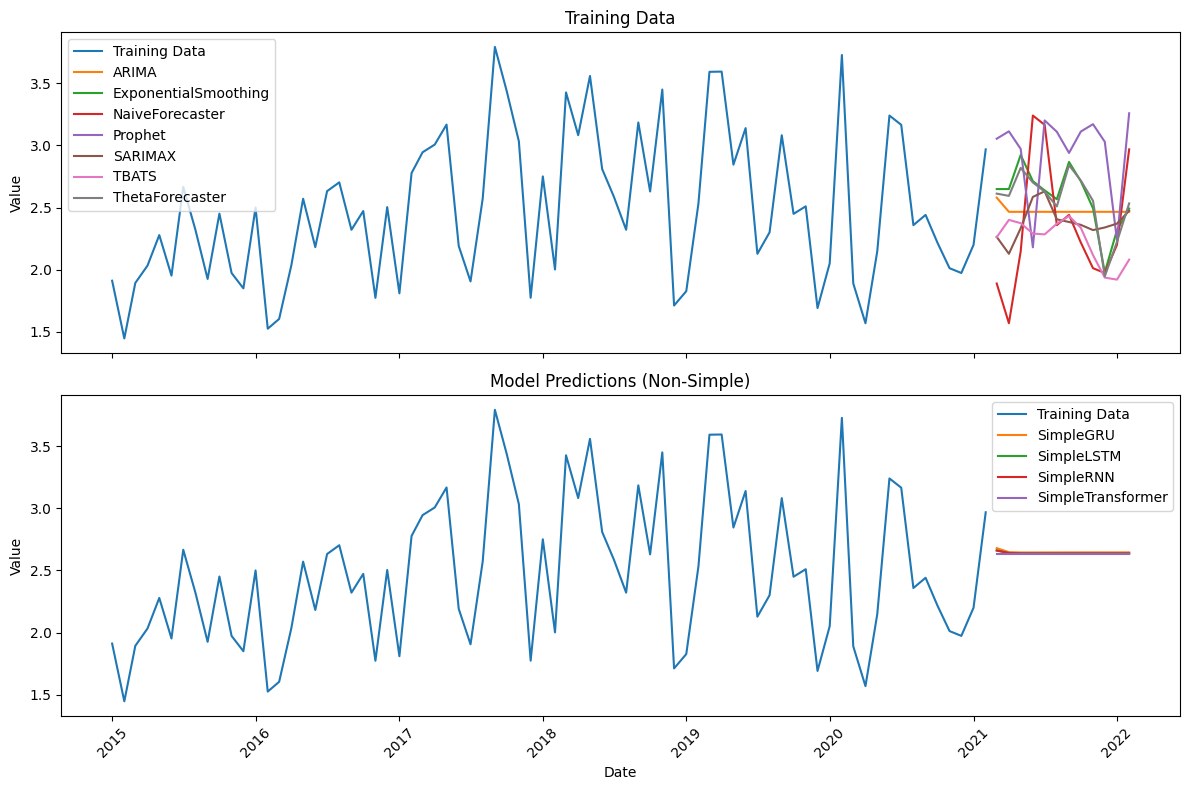

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting the training data in the first subplot
axs[0].plot(df['date'], df['y'], label='Training Data')
axs[1].plot(df['date'], df['y'], label='Training Data')

axs[0].set_ylabel('Value')
axs[0].set_title('Training Data')

# Plotting model predictions with 'Simple' in their names in the second subplot
for model_name in results_wide_df.columns[1:]:
    if 'Simple' not in model_name:
        axs[0].plot(results_wide_df['date'], results_wide_df[model_name], label=model_name)
    else:
        axs[1].plot(results_wide_df['date'], results_wide_df[model_name], label=model_name)

axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].set_title('Model Predictions (Non-Simple)')
axs[1].legend()
axs[0].legend()


# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()


## Model Predictions and Training Data

The plot above illustrates the predictions made by various models alongside the training data. Two subplots are presented, where the first subplot displays the training data and predictions from simpler models, while the second subplot shows predictions from more complex deep learning models.

### Training Data and Predictions from Simple Models
The top subplot depicts the complete training data over the given time period, along with predictions from simpler models. These simpler models include:

- NaiveForecaster: A baseline model that predicts future values based on the most recent observed value.
- ThetaForecaster: Applies a transformation to the time series data to make it smoother and uses simple exponential smoothing for forecasting.
- ExponentialSmoothing: Uses exponential weights to smooth past data, allowing it to forecast based on trends and seasonality.
- TBATS: Handles complex seasonal patterns and multiple seasonality using Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal components.
- AutoARIMA: An automated version of the ARIMA model, widely used for its flexibility in handling different types of time series data.

### Predictions from Deep Learning Models
The bottom subplot shows predictions from more complex deep learning models, including:

- SimpleRNN: A basic Recurrent Neural Network model that can capture temporal dependencies in data.
- SimpleLSTM: A Long Short-Term Memory model, effective for capturing long-term dependencies.
- SimpleGRU: A Gated Recurrent Unit model, similar to LSTM but more efficient.
- SimpleTransformer: Utilizes the Transformer architecture, known for its self-attention mechanism.

**Note:** The 'Simple' models, particularly the deep learning models like SimpleRNN, SimpleLSTM, SimpleGRU, and SimpleTransformer, had insufficient data to make reasonable predictions and appeared to have learned to predict the mean of the y value.